# Temperature Forecast Project using ML
Project 9

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
#pd.set_option('display.max_columns',None)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

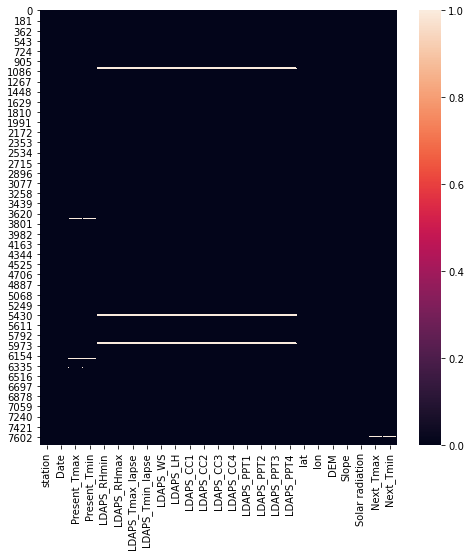

In [6]:
plt.figure(figsize=[8,8])
sns.heatmap(df.isnull())

In [7]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


## Feature Extraction:

In [8]:
df["Date"]=pd.to_datetime(df["Date"])

In [9]:
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month

In [10]:
df['Date'].isnull().sum()

2

### Replacing Null Values:

In [11]:
df_median=df.copy()

In [12]:
df_median.station.fillna(df_median.station.median(), inplace = True)
df_median.Present_Tmax.fillna(df_median.Present_Tmax.median(), inplace = True)
df_median.Present_Tmin.fillna(df_median.Present_Tmin.median(), inplace = True)
df_median.LDAPS_RHmin.fillna(df_median.LDAPS_RHmin.median(), inplace = True)
df_median.LDAPS_RHmax.fillna(df_median.LDAPS_RHmax.median(), inplace = True)
df_median.LDAPS_Tmax_lapse.fillna(df_median.LDAPS_Tmax_lapse.median(), inplace = True)
df_median.LDAPS_Tmin_lapse.fillna(df_median.LDAPS_Tmin_lapse.median(), inplace = True)
df_median.LDAPS_WS.fillna(df_median.LDAPS_WS.median(), inplace = True)
df_median.LDAPS_LH.fillna(df_median.LDAPS_LH.median(), inplace = True)
df_median.LDAPS_CC1.fillna(df_median.LDAPS_CC1.median(), inplace = True)
df_median.LDAPS_CC2.fillna(df_median.LDAPS_CC2.median(), inplace = True)
df_median.LDAPS_CC3.fillna(df_median.LDAPS_CC3.median(), inplace = True)
df_median.LDAPS_CC4.fillna(df_median.LDAPS_CC4.median(), inplace = True)
df_median.LDAPS_PPT1.fillna(df_median.LDAPS_PPT1.median(), inplace = True)
df_median.LDAPS_PPT2.fillna(df_median.LDAPS_PPT2.median(), inplace = True)
df_median.LDAPS_PPT3.fillna(df_median.LDAPS_PPT3.median(), inplace = True)
df_median.LDAPS_PPT4.fillna(df_median.LDAPS_PPT4.median(), inplace = True)
df_median.lat.fillna(df_median.lat.median(), inplace = True)
df_median.lon.fillna(df_median.lon.median(), inplace = True)
df_median.DEM.fillna(df_median.DEM.median(), inplace = True)
df_median.Slope.fillna(df_median.Slope.median(), inplace = True)
df_median['Solar radiation'].fillna(df_median['Solar radiation'].median(), inplace = True)
df_median.Next_Tmax.fillna(df_median.Next_Tmax.median(), inplace = True)
df_median.Next_Tmin.fillna(df_median.Next_Tmin.median(), inplace = True)
df_median.day.fillna(df_median.day.median(), inplace = True)
df_median.month.fillna(df_median.month.median(), inplace = True)

In [13]:
df_median.drop(['Date'],axis=1,inplace=True)

In [14]:
df_median.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
month               0
dtype: int64

In [15]:
df_median[df_median.isnull().any(axis=1)]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month


In [ ]:
df_median.describe()

# EDA:

#### Uniariate Analysis:

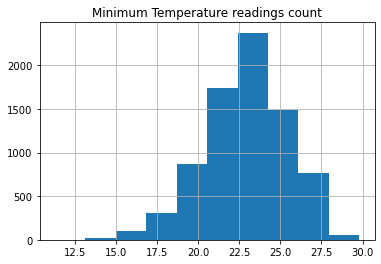

In [17]:
df["Next_Tmin"].hist(grid=True)
plt.title("Minimum Temperature readings count")
plt.show()

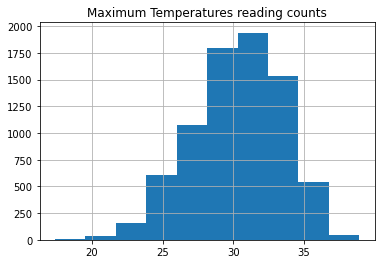

In [18]:
df["Next_Tmax"].hist(grid=True)
plt.title("Maximum Temperatures reading counts")
plt.show()

<AxesSubplot:xlabel='lat', ylabel='count'>

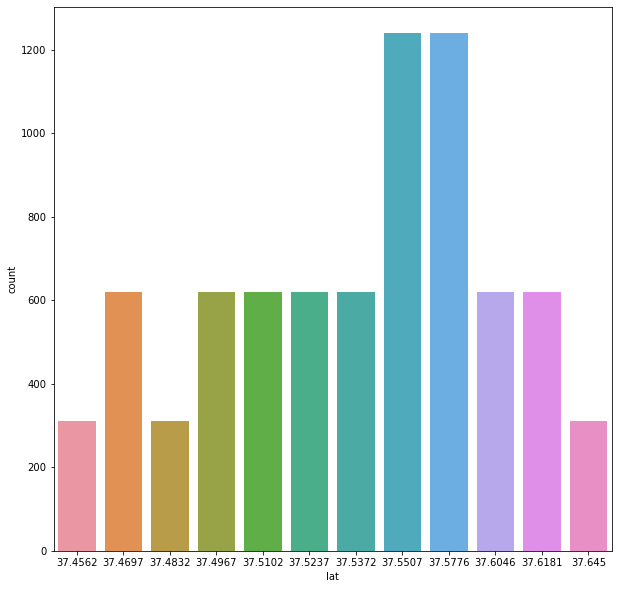

In [19]:
plt.subplots(figsize=(10,10))
sns.countplot(x='lat',data=df_median)

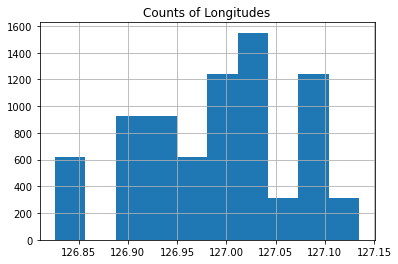

In [20]:
df["lon"].hist(grid=True)
plt.title("Counts of Longitudes")
plt.show()

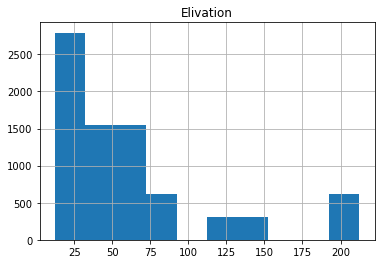

In [77]:
df["DEM"].hist(grid=True)
plt.title("Elivation")
plt.show()

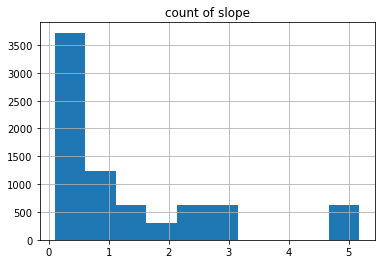

In [22]:
df["Slope"].hist(grid=True)
plt.title("count of slope")
plt.show()

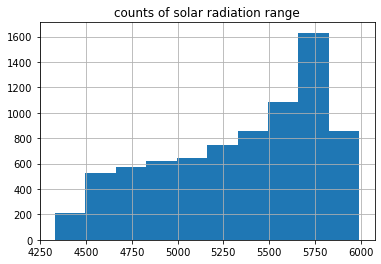

In [23]:
df["Solar radiation"].hist(grid=True)
plt.title("counts of solar radiation range")
plt.show()

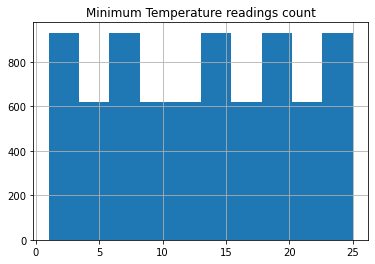

In [24]:
df["station"].hist(grid=True)
plt.title("Minimum Temperature readings count")
plt.show()

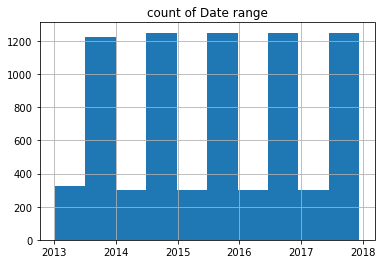

In [25]:
df["Date"].hist(grid=True)
plt.title(" Dates of rcordings")
plt.show()

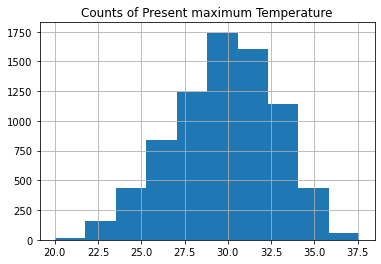

In [26]:
df["Present_Tmax"].hist(grid=True)
plt.title("Counts of Present maximum Temperature")
plt.show()

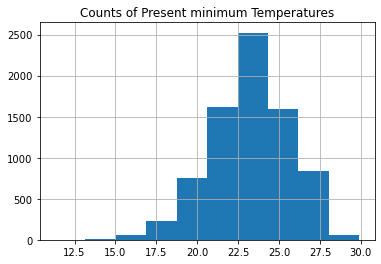

In [27]:
df["Present_Tmin"].hist(grid=True)
plt.title("Counts of Present minimum Temperatures")
plt.show()

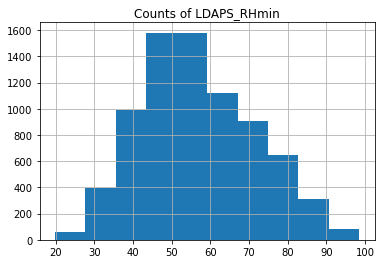

In [28]:
df["LDAPS_RHmin"].hist(grid=True)
plt.title("Counts of LDAPS_RHmin")
plt.show()

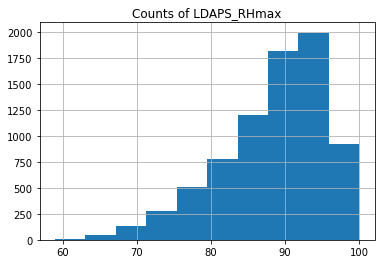

In [29]:
df["LDAPS_RHmax"].hist(grid=True)
plt.title("Counts of LDAPS_RHmax")
plt.show()

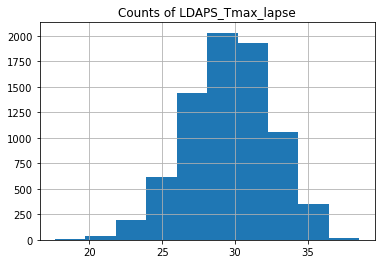

In [30]:
df["LDAPS_Tmax_lapse"].hist(grid=True)
plt.title("Counts of LDAPS_Tmax_lapse")
plt.show()

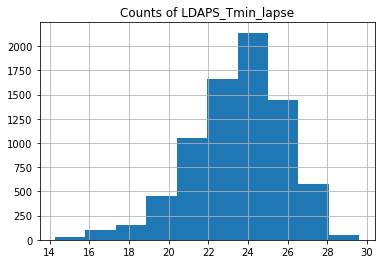

In [31]:
df["LDAPS_Tmin_lapse"].hist(grid=True)
plt.title("Counts of LDAPS_Tmin_lapse")
plt.show()

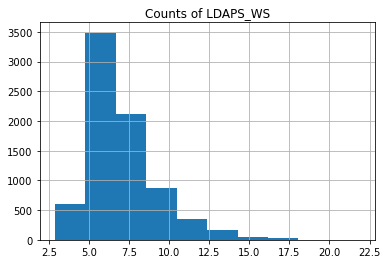

In [32]:
df["LDAPS_WS"].hist(grid=True)
plt.title("Counts of LDAPS_WS")
plt.show()

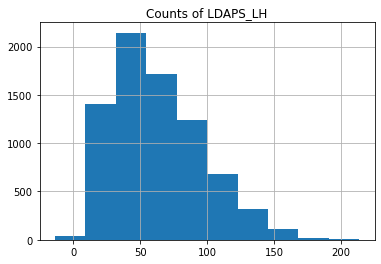

In [33]:
df["LDAPS_LH"].hist(grid=True)
plt.title("Counts of LDAPS_LH")
plt.show()

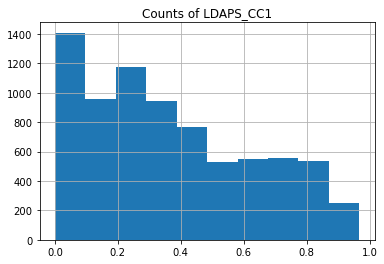

In [34]:
df["LDAPS_CC1"].hist(grid=True)
plt.title("Counts of LDAPS_CC1")
plt.show()

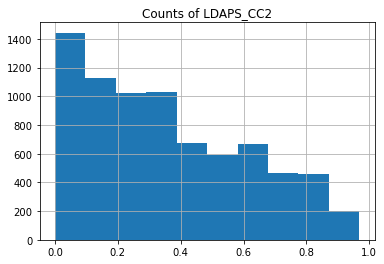

In [35]:
df["LDAPS_CC2"].hist(grid=True)
plt.title("Counts of LDAPS_CC2")
plt.show()

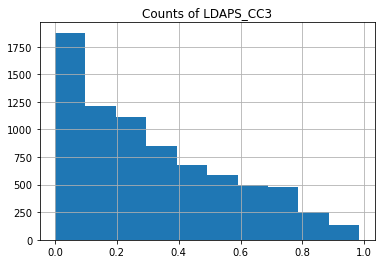

In [36]:
df["LDAPS_CC3"].hist(grid=True)
plt.title("Counts of LDAPS_CC3")
plt.show()

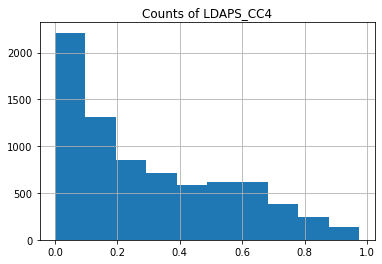

In [37]:
df["LDAPS_CC4"].hist(grid=True)
plt.title("Counts of LDAPS_CC4")
plt.show()

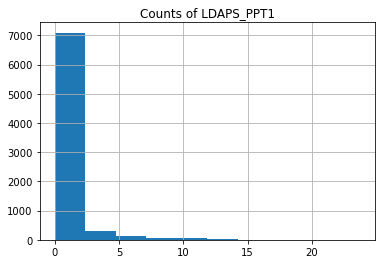

In [38]:
df["LDAPS_PPT1"].hist(grid=True)
plt.title("Counts of LDAPS_PPT1")
plt.show()

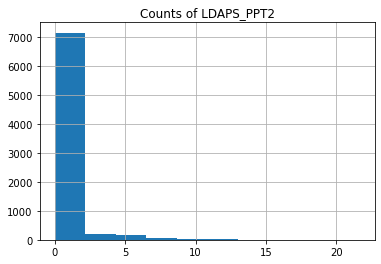

In [39]:
df["LDAPS_PPT2"].hist(grid=True)
plt.title("Counts of LDAPS_PPT2")
plt.show()

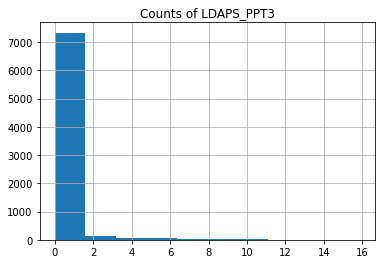

In [40]:
df["LDAPS_PPT3"].hist(grid=True)
plt.title("Counts of LDAPS_PPT3")
plt.show()

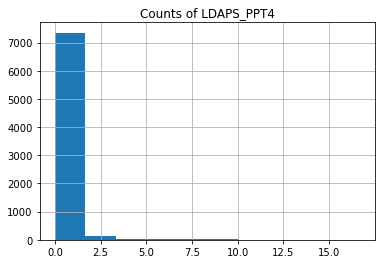

In [41]:
df["LDAPS_PPT4"].hist(grid=True)
plt.title("Counts of LDAPS_PPT4")
plt.show()

### Multivariate Analysis:

In [42]:
corr_mat=df_median.corr()
corr_mat

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month
station,1.000000e+00,0.112582,0.131525,-0.066729,-0.166953,0.069107,0.104753,0.005275,-0.133339,0.006917,...,-0.010399,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107900,0.128216,1.721796e-17,2.186980e-17
Present_Tmax,1.125819e-01,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.123565,0.134216,-0.313176,...,-0.101118,-0.052659,0.008990,-0.187138,-0.105884,-0.025401,0.610256,0.622700,-1.437949e-01,-1.159627e-03
Present_Tmin,1.315245e-01,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.037682,-0.011331,0.082000,...,-0.065550,-0.078547,-0.043509,-0.250299,-0.146460,0.053638,0.471723,0.796657,-1.082454e-01,-3.443475e-03
LDAPS_RHmin,-6.672872e-02,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,0.613885,...,0.168797,0.087093,-0.076232,0.102108,0.123736,0.244643,-0.439171,0.094061,-6.629070e-02,-5.457641e-02
LDAPS_RHmax,-1.669531e-01,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,0.436097,...,0.117376,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281282,-0.070193,-1.222295e-02,-3.889740e-02
LDAPS_Tmax_lapse,6.910687e-02,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,-0.438410,...,-0.160300,-0.042093,0.090665,-0.178895,-0.162332,0.047820,0.827473,0.587066,-1.601958e-01,-2.151881e-02
LDAPS_Tmin_lapse,1.047525e-01,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,0.010691,...,-0.094855,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588224,0.881074,-1.775265e-01,-2.691354e-02
LDAPS_WS,5.275379e-03,-0.123565,-0.037682,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,0.289792,...,0.144550,0.036646,-0.059448,0.190995,0.171577,0.122966,-0.345578,-0.098730,-3.013374e-02,-8.265652e-02
LDAPS_LH,-1.333385e-01,0.134216,-0.011331,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,-0.146920,...,0.020332,0.133203,0.025819,0.055126,0.086770,-0.046553,0.155684,-0.056832,-1.275628e-02,-2.366484e-02
LDAPS_CC1,6.917419e-03,-0.313176,0.082000,0.613885,0.436097,-0.438410,0.010691,0.289792,-0.146920,1.000000,...,0.092119,-0.008129,-0.006842,-0.014087,-0.020747,0.219264,-0.454771,-0.012732,-2.092459e-02,-7.736128e-02


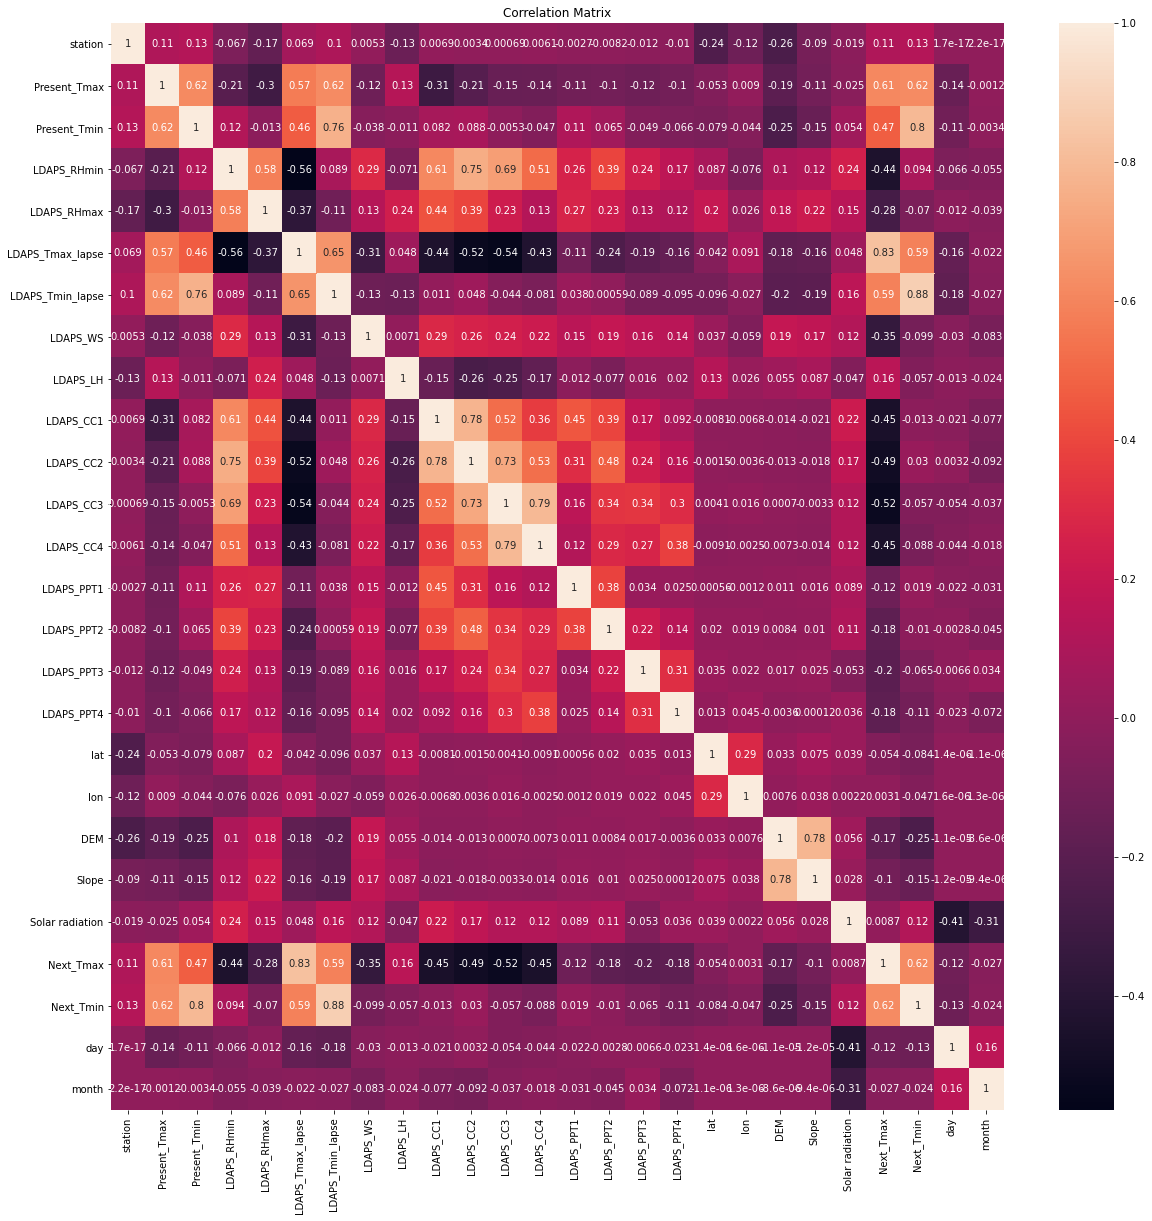

In [43]:
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

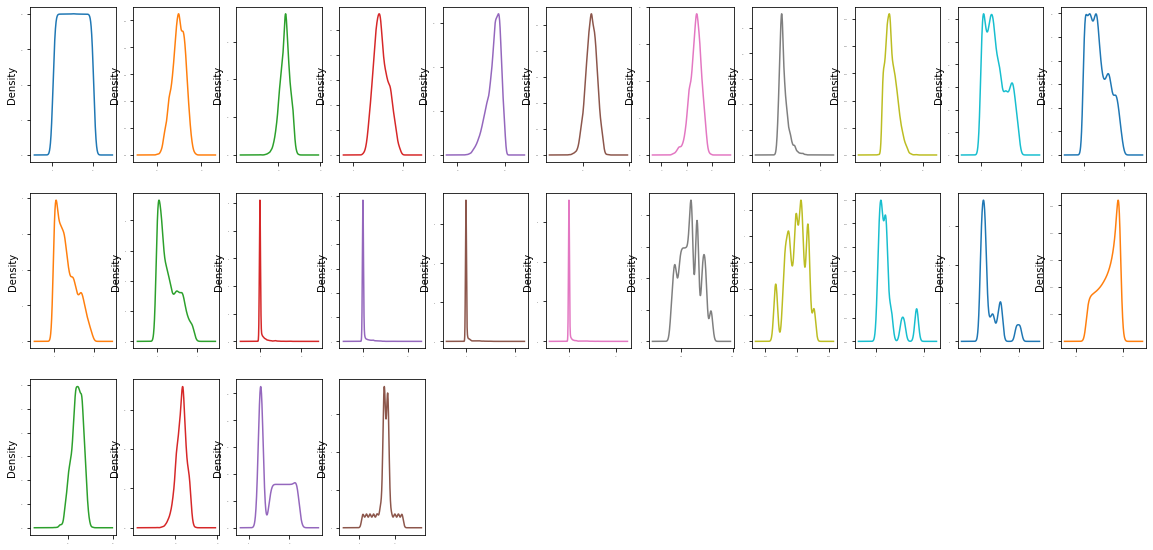

In [44]:
df_median.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

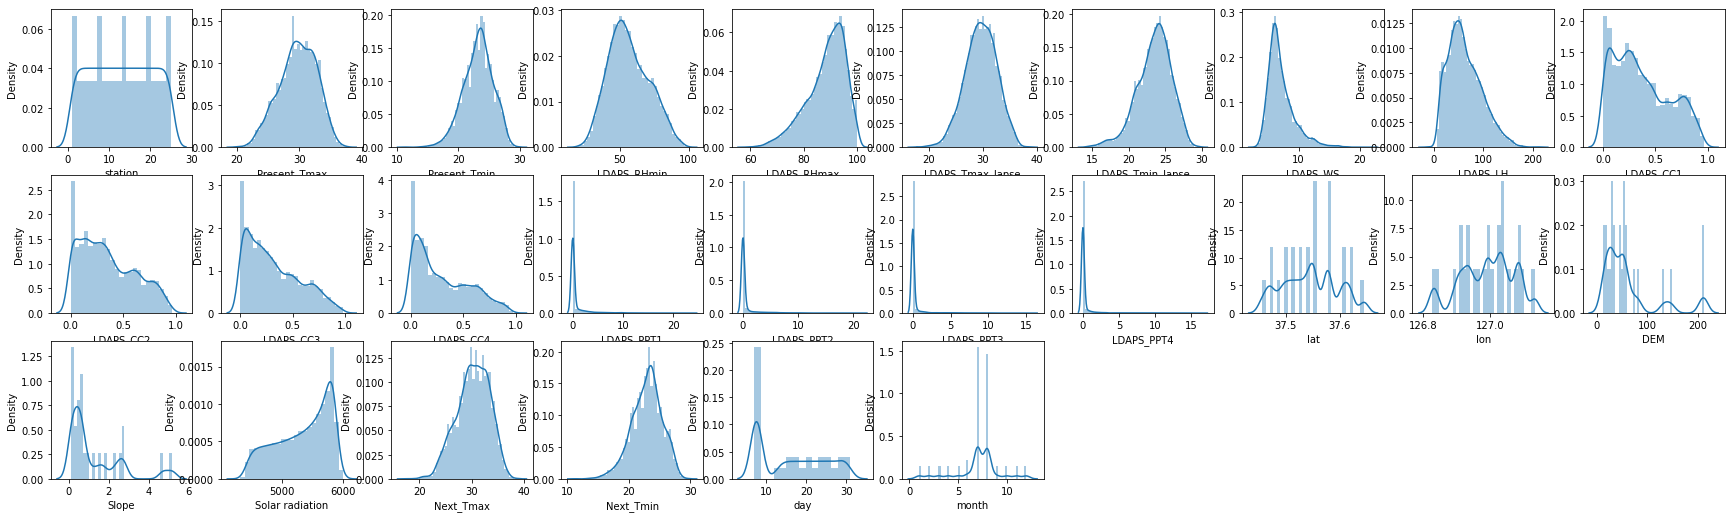

In [45]:
collist=df_median.columns.values
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

# Label encoding:
As almost all the columns are in float type we need not have to do encoding and replace the values.
So lets proceed with the actual data processed above code blocks.

# Lets check for Outliers:

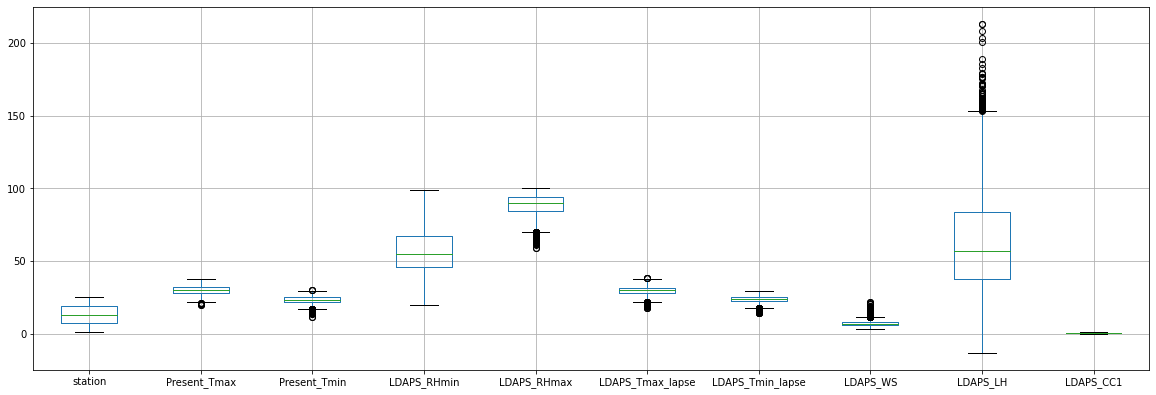

In [46]:
df_median.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

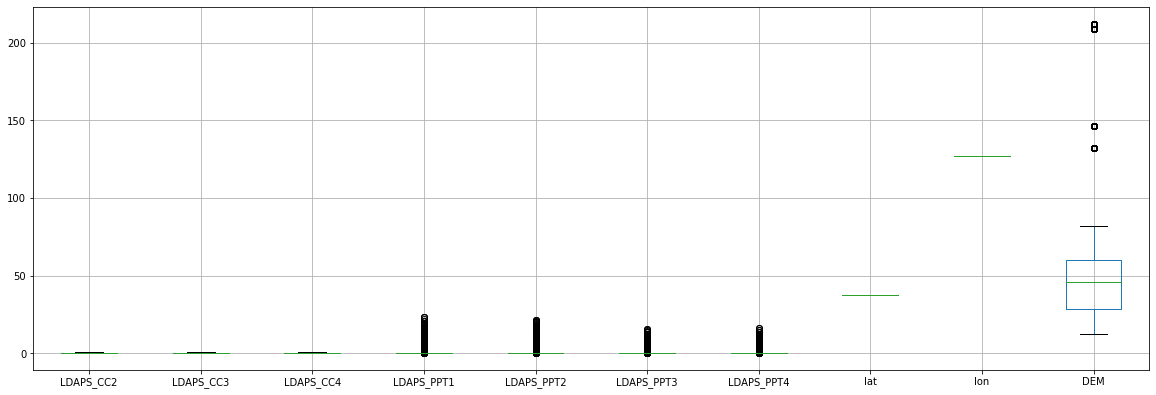

In [47]:
df_median.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

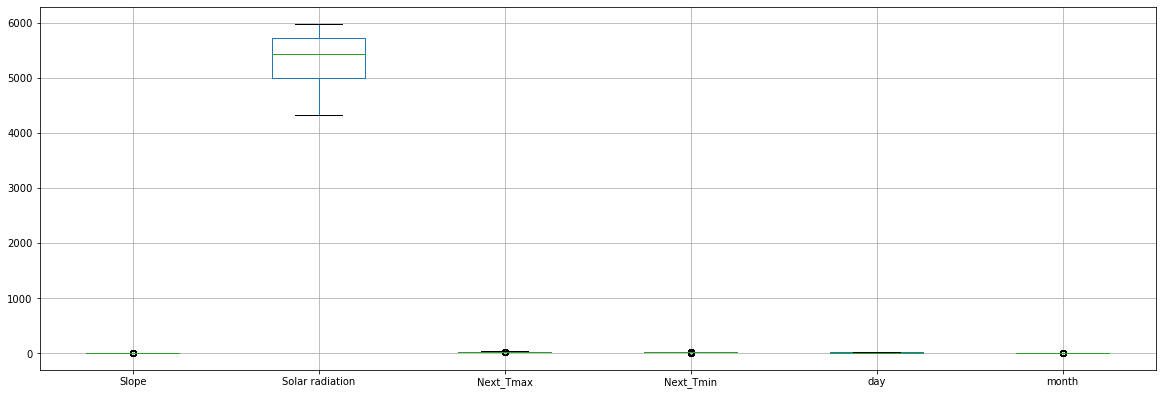

In [48]:
df_median.iloc[:,20:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Outlier Removal:

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df_median))
df_zscore=df_median[(z<3).all(axis=1)]

In [50]:
df_zscore.shape

(6894, 26)

In [51]:
df_median.shape

(7752, 26)

In [52]:
((7752-6894)/7752)*100

11.06811145510836

### Feature selection:

### MultiOutput method:
As we have 2 output variables "Next_Tmax","Next_Tmin" lets take both columns in Y variable 
as some models support for multiple output.
So that we can predict for both columns.

In [53]:
x=df_median.drop(columns=["Next_Tmax","Next_Tmin"])
y=df_median[["Next_Tmax","Next_Tmin"]]

In [54]:
y.shape , x.shape, df_median.shape

((7752, 2), (7752, 24), (7752, 26))

# Skewness Removal:

In [55]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [56]:
x=df_skew

## Scaling:

In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x=ss.transform(x)
x=pd.DataFrame(x)

# Checking for Best Random_State:

In [58]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=(r2_score(y_test,pred))
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)


Best accuracy is   0.8173754381949563   at random_state: 160


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6201, 24), (1551, 24), (6201, 2), (1551, 2))

# Model Building:
Lets Try to check with 4 to 5 models for good accuracy scores

In [61]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[ 1.88786662e-01  5.25801365e-01  1.97300763e-01  4.75036898e-01
   2.45297489e-02  1.96678555e+00 -1.21319023e-02 -2.84530017e-01
   1.95853938e-01 -7.53207281e-02 -1.54284166e-01 -1.55626939e-01
  -3.45088517e-01 -1.90884785e-01 -7.15501122e-02 -1.03641808e-01
   4.49496181e-02  0.00000000e+00 -1.40738208e-01  2.29388068e-02
  -1.55325839e-02  5.01034615e-02  7.50132716e-02 -9.57080824e-02]
 [ 3.15932654e-02  2.34426779e-01  6.04218595e-01  3.61445210e-01
   1.76288350e-01  5.06417213e-01  1.16979123e+00  9.50733715e-02
  -1.34342691e-02  5.75675596e-02  1.31000508e-01 -2.85571833e-03
   4.22305651e-02 -1.64100587e-01 -1.65319893e-01 -3.56163315e-02
  -1.22613535e-01  2.77555756e-17 -1.68713424e-02 -3.03513466e-01
   1.42527658e-01  6.96399025e-02  1.26848541e-01  3.47135008e-03]]
Intercept   :  [30.26761184 22.92411444]
Score       :  0.7901330154952566
 
error
Mean absolute error    : 0.949577248744675
Mean squared error     : 1.5911005555513682
Root mean squared er

In [62]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[ 0.18852264  0.52540997  0.19687672  0.47365375  0.02456909  1.9654343
  -0.01041759 -0.28441125  0.19604289 -0.07547623 -0.15425546 -0.15550906
  -0.34484785 -0.19064054 -0.07144225 -0.10342072  0.04466994  0.
  -0.14055908  0.02221204 -0.01481473  0.05001936  0.07476351 -0.09562438]
 [ 0.03158507  0.23397487  0.60437829  0.36100726  0.17607892  0.50586059
   1.17028376  0.09489854 -0.01320054  0.05709648  0.13069925 -0.00203727
   0.04162285 -0.1637135  -0.16503842 -0.03569324 -0.12239202  0.
  -0.01682505 -0.30304665  0.14211869  0.06952425  0.12661837  0.00334363]]
Intercept   :  [30.26760223 22.92411809]
Score       :  0.7901329247549893
 
error
Mean absolute error    : 0.949554191269405
Mean squared error     : 1.5910568874941147
Root mean squared error: 1.2613710348244542
 
r2 score :  0.817381710425304


In [63]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[ 0.18878665  0.52580133  0.19730077  0.47503672  0.02452977  1.9667853
  -0.0121317  -0.28453003  0.19585395 -0.07532076 -0.15428418 -0.15562695
  -0.3450885  -0.19088476 -0.07155012 -0.1036418   0.04494962  0.
  -0.14073819  0.0229388  -0.01553257  0.05010348  0.07501326 -0.09570808]
 [ 0.03159327  0.23442679  0.6042186   0.36144522  0.17628834  0.50641723
   1.16979118  0.09507337 -0.01343427  0.05756757  0.13100051 -0.00285571
   0.04223056 -0.16410059 -0.16531989 -0.03561633 -0.12261353  0.
  -0.01687135 -0.30351345  0.14252764  0.0696399   0.12684854  0.00347135]]
Intercept   :  [30.26761184 22.92411444]
Score       :  0.7901330154952559
 
error
Mean absolute error    : 0.9495772482749368
Mean squared error     : 1.5911005546886097
Root mean squared error: 1.261388344122701
 
r2 score :  0.817375438221142


In [64]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9853691150782466
 
error
Mean absolute error    : 0.6623745970341708
Mean squared error     : 0.7683979007092201
Root mean squared error: 0.8765830826049634
 
r2 score :  0.9085237689834975


In [65]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
kn.score(x_train,y_train)
print("Score       : ",kn.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9159727519186633
 
error
Mean absolute error    : 0.7246421663442935
Mean squared error     : 0.9442968407479064
Root mean squared error: 0.9717493713648115
 
r2 score :  0.8873654647487095


In [66]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
dt.score(x_train,y_train)
print("Score       : ",dt.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  1.0
 
error
Mean absolute error    : 0.9580270793036744
Mean squared error     : 1.6970921985815581
Root mean squared error: 1.3027249128582588
 
r2 score :  0.7965788615104636


# Predicting Multiple Output:

In [67]:
#Pridict the multiple column output value
pred=rf.predict(x_test)
print("Predicted Temperature with 2 output : ","\n", pred )
print("Actual Temperature with 2 output :","\n", y_test)

Predicted Temperature with 2 output :  
 [[26.605 21.679]
 [32.866 24.674]
 [23.653 17.031]
 ...
 [26.186 21.587]
 [29.999 20.396]
 [29.323 23.496]]
Actual Temperature with 2 output : 
       Next_Tmax  Next_Tmin
6269       27.8       21.5
1752       33.3       24.6
6154       25.4       17.0
7689       23.1       16.4
5032       23.5       19.6
...         ...        ...
5560       35.3       25.9
835        33.0       26.3
4659       26.7       21.8
3058       30.0       20.1
7563       28.7       23.4

[1551 rows x 2 columns]


# Cross Validation score checking:

In [68]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(lm,x,y,cv=cv,scoring='r2')
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.7939572054102796


In [69]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(ls,x,y,cv=cv)
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.7939607231370229


In [70]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(rd,x,y,cv=cv)
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.7939572054801237


In [71]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(rf,x,y,cv=cv)
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.902355730861525


In [72]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(kn,x,y,cv=cv)
print("Cross Validation Score of KNeighborsRegressor Model is : ", scr.mean())

Cross Validation Score of KNeighborsRegressor Model is :  0.8776026526867764


In [73]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(dt,x,y,cv=cv)
print("Cross Validation Score of DecisionTreeRegressor Model is : ", scr.mean())

Cross Validation Score of DecisionTreeRegressor Model is :  0.7716286882632717


# Parameter Tuning:
Random Forest Regressor

In [74]:
parameters={"bootstrap":[True,False], "criterion":["mse", "mae"],}

In [75]:
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5,scoring='r2') #Tuning

In [76]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae']},
             scoring='r2')

In [119]:
gcv.best_params_

{'bootstrap': True, 'criterion': 'mse'}

In [120]:
mod=RandomForestRegressor(bootstrap= True, criterion='mse',random_state=maxRS)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

90.67243911120717


# Observation: From the above tuning we can see that Rando Forest Regressor has 91% best performance, good accuracy and r2_score.

# Saving the Model:

In [121]:
import joblib
joblib.dump(mod,"min_max_temp.pkl")

['min_max_temp.pkl']

In [122]:
mod=joblib.load("min_max_temp.pkl")

In [123]:
prediction=mod.predict(x_test)

In [124]:
print(r2_score(y_test,prediction)*100)

90.67243911120717


In [125]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [126]:
prediction.to_csv('min_max_temp.csv') #Saving the predictions

In [127]:
prediction

,0,1
0,26.377,21.695
1,32.904,24.659
2,23.651,17.028
3,24.734,18.121
4,23.522,19.916
...,...,...
1546,35.595,26.397
1547,32.270,25.970
1548,26.185,21.617
1549,29.930,20.416


# Conclusion & Observation:
Hence we have got Best accuracy with Random Forest Regressor model. We have saved and loaded that for checking purpose and predicted in above steps.

